<a href="https://colab.research.google.com/github/MDRobiulhassan/Spam-Email-Detection/blob/main/SpamEmailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIL Project Colab/Final Project 2/spam_dataset.csv')

In [4]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10024 entries, 0 to 10023
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10024 non-null  object
 1   text    10024 non-null  object
dtypes: object(2)
memory usage: 156.8+ KB


In [6]:
df

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
10019,ham,this would be a great tragedy for all concerne...
10020,ham,"hello , welcome to medzonline filamentous shop..."
10021,ham,this is amazing stuff add some inches fast saf...
10022,spam,author jra date escapenumber escapenumber esca...


# Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['label'] = encoder.fit_transform(df['label'])

In [9]:
#null
df.isnull().sum()

,0
label,0
text,0


In [10]:
df=df.dropna()

In [11]:
#Duplicate
df.duplicated().sum()

0

In [12]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(10024, 2)

In [14]:
df['label'].value_counts()

,count
label,
0,5314
1,4710


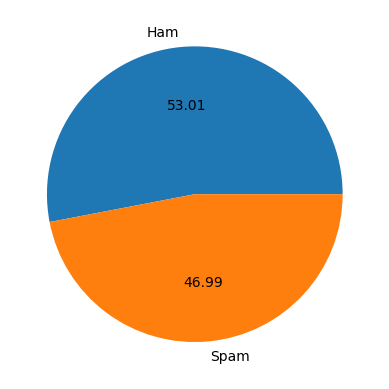

In [15]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [16]:
df['length']=df['text'].apply(len)

In [17]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [21]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [23]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,10024.000000,10024.000000,10024.000000
mean,1616.675778,276.361433,7.003492
std,3324.887705,582.073147,26.321990
min,4.000000,1.000000,1.000000
25%,438.000000,78.000000,1.000000
50%,855.500000,150.000000,1.000000
75%,1862.000000,311.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [24]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5314.000000,5314.000000,5314.000000
mean,1276.106135,214.930749,6.500753
std,2683.761852,470.774338,20.720472
min,4.000000,1.000000,1.000000
25%,348.000000,59.000000,1.000000
50%,675.500000,117.000000,1.000000
75%,1476.750000,244.750000,4.000000
max,141261.000000,24945.000000,502.000000


In [25]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4710.000000,4710.000000,4710.000000
mean,2000.919321,345.669851,7.570701
std,3889.097315,679.726936,31.459426
min,4.000000,1.000000,1.000000
25%,573.000000,107.000000,1.000000
50%,1110.000000,196.500000,1.000000
75%,2158.000000,377.750000,6.000000
max,85490.000000,16876.000000,988.000000


In [26]:
import seaborn as sns

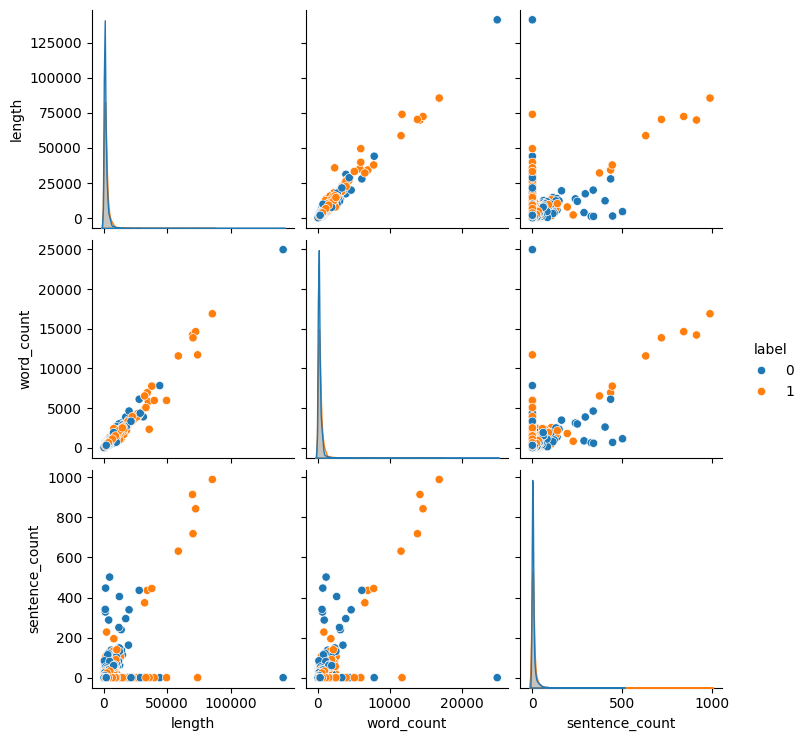

In [27]:
sns.pairplot(df,hue='label')

<Axes: >

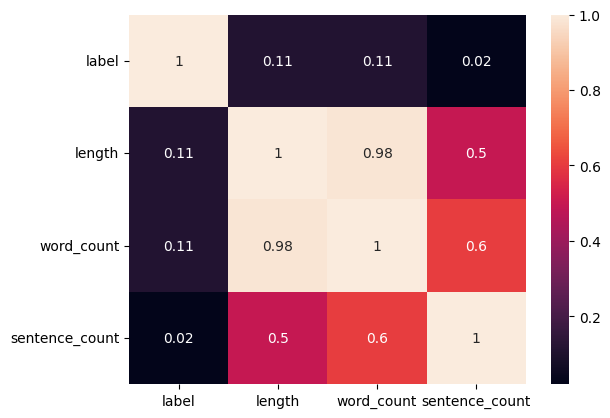

In [28]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [30]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

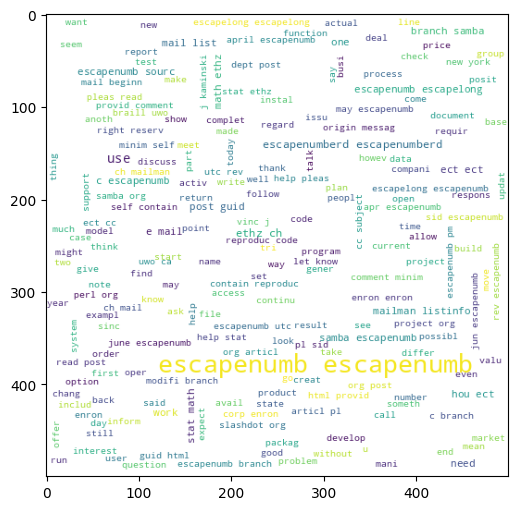

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

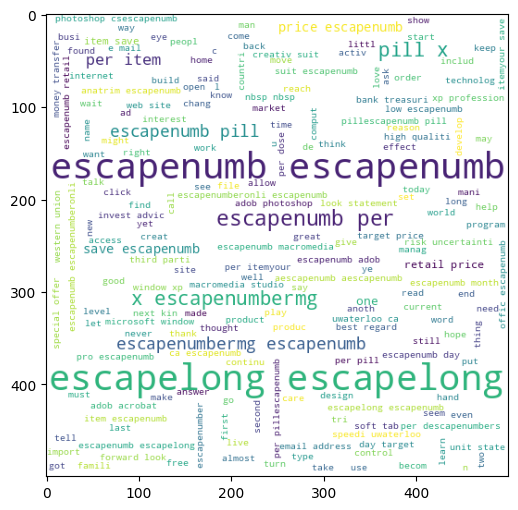

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [41]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)


1010177

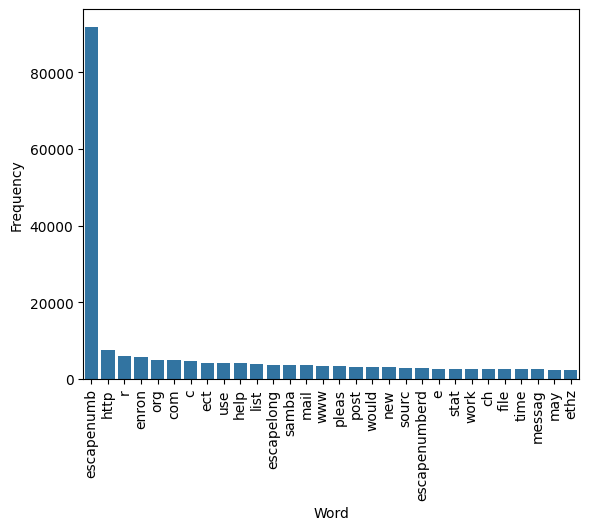

In [43]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [44]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

677870

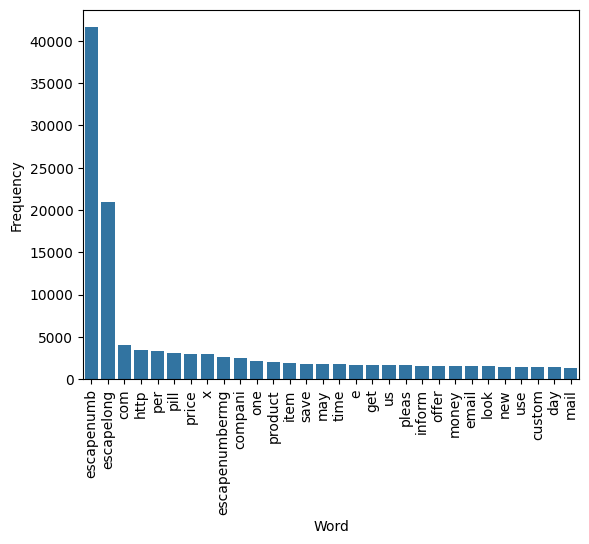

In [46]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [47]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [48]:
df['processed_length'] = df['transformed_text'].apply(len)

In [49]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


In [50]:
first_row = df.iloc[0]
print("Original Text:\n", first_row['text'])
print("\nTransformed Text:\n", first_row['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [51]:
import re

def remove_escape_words(text):
    return re.sub(r'\bescape\w*\b', '', text)

first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])

<ipython-input-51-f30d36c2c815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])


In [52]:
first_row_copy = first_row.copy()

first_row_copy['transformed_text'] = remove_escape_words(first_row_copy['transformed_text'])

print("Original Text:\n", first_row['text'])
print("\nUpdated Transformed Text:\n", first_row_copy['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [53]:
df['transformed_text'] = df['transformed_text'].apply(remove_escape_words)

In [54]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,440


In [55]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [56]:
import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [57]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: clean_transformed_text(str(x)))

In [58]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

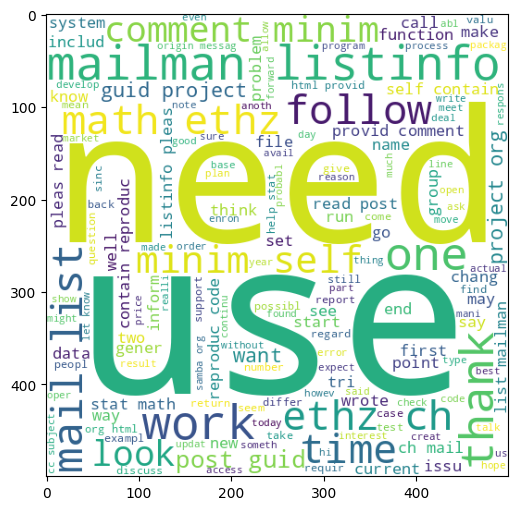

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

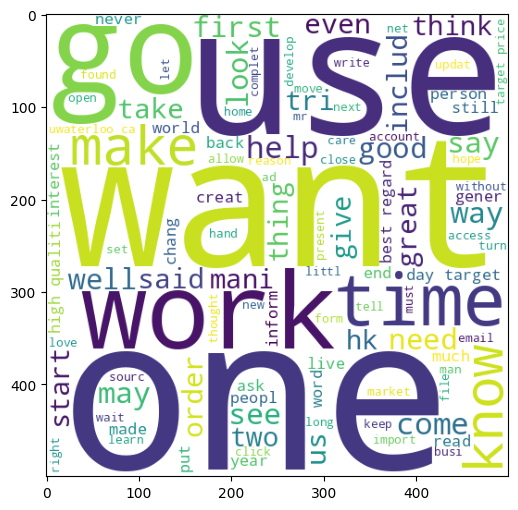

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

448473

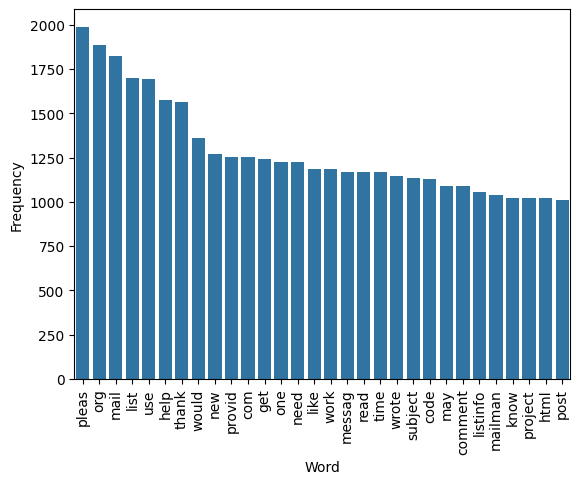

In [64]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

401292

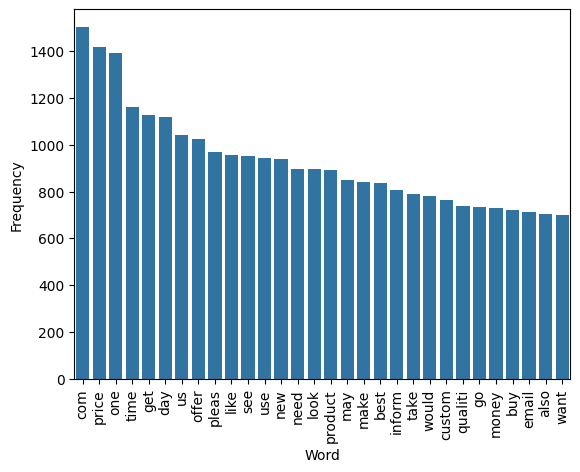

In [67]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
df['processed_length'] = df['transformed_text'].apply(len)

In [69]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray th...,391
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter april first deal ticket cover p...,82
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target pri...,109
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look user enter string ...,349
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev dir c...,308


# Intial Model Development

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(10024, 3000)

In [73]:
y = df['label'].values


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9226932668329177
[[988 114]
 [ 41 862]]
0.8831967213114754


In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.944638403990025
[[1041   61]
 [  50  853]]
0.9332603938730853


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8977556109725686
[[1036   66]
 [ 139  764]]
0.9204819277108434


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [84]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9705735660847881,
 0.9720357941834452,
 0.9623477297895903,
 0.9642698624056814)

In [86]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9705735660847881
Precision - 0.9720357941834452
Recall    - 0.9623477297895903
F2 Score  - 0.9642698624056814

For KN:
Accuracy  - 0.6513715710723192
Precision - 1.0
Recall    - 0.22591362126245848
F2 Score  - 0.2672955974842767

For NB:
Accuracy  - 0.944638403990025
Precision - 0.9332603938730853
Recall    - 0.9446290143964563
F2 Score  - 0.9423331860362351

For DT:
Accuracy  - 0.8493765586034913
Precision - 0.9077340569877883
Recall    - 0.7408637873754153
F2 Score  - 0.769142331570476

For LR:
Accuracy  - 0.9620947630922694
Precision - 0.9747416762342136
Recall    - 0.9401993355481728
F2 Score  - 0.9469105509703324

For RF:
Accuracy  - 0.9675810473815462
Precision - 0.9686800894854586
Recall    - 0.9590254706533776
F2 Score  - 0.9609409675987572

For AdaBoost:
Accuracy  - 0.8793017456359102
Precision - 0.9472259810554804
Recall    - 0.7751937984496124
F2 Score  - 0.8044127786715698

For ETC:
Accuracy  - 0.969077306733167
Precision - 0.9595628415300547
Recall  

In [87]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('Recall', ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
7,ETC,0.969077,0.959563,0.972315,0.969737
0,SVC,0.970574,0.972036,0.962348,0.964270
5,RF,0.967581,0.968680,0.959025,0.960941
2,NB,0.944638,0.933260,0.944629,0.942333
4,LR,0.962095,0.974742,0.940199,0.946911
9,xgb,0.958603,0.966970,0.940199,0.945434
8,GBDT,0.918703,0.960199,0.854928,0.874094
6,AdaBoost,0.879302,0.947226,0.775194,0.804413
3,DT,0.849377,0.907734,0.740864,0.769142
1,KN,0.651372,1.000000,0.225914,0.267296


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.969077
1,SVC,Accuracy,0.970574
2,RF,Accuracy,0.967581
3,NB,Accuracy,0.944638
4,LR,Accuracy,0.962095
5,xgb,Accuracy,0.958603
6,GBDT,Accuracy,0.918703
7,AdaBoost,Accuracy,0.879302
8,DT,Accuracy,0.849377
9,KN,Accuracy,0.651372


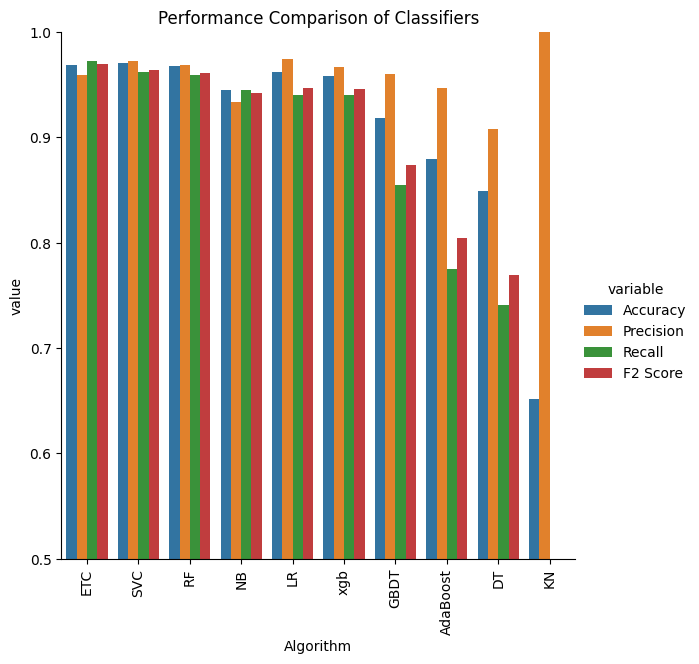

In [91]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [92]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[1077   25]
 [  34  869]]


Confusion Matrix for KN:
 [[1102    0]
 [ 699  204]]


Confusion Matrix for NB:
 [[1041   61]
 [  50  853]]


Confusion Matrix for DT:
 [[1034   68]
 [ 232  671]]


Confusion Matrix for LR:
 [[1080   22]
 [  54  849]]


Confusion Matrix for RF:
 [[1074   28]
 [  37  866]]


Confusion Matrix for AdaBoost:
 [[1063   39]
 [ 203  700]]


Confusion Matrix for ETC:
 [[1065   37]
 [  25  878]]


Confusion Matrix for GBDT:
 [[1070   32]
 [ 131  772]]


Confusion Matrix for xgb:
 [[1073   29]
 [  54  849]]




#Model Optimization

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [95]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F2 Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.969077,0.959563,0.972315,0.969737,0.969077,0.959563,0.969077,0.959563,0.969077,0.959563
1,SVC,0.970574,0.972036,0.962348,0.964270,0.970574,0.972036,0.970574,0.972036,0.970574,0.972036
2,RF,0.967581,0.968680,0.959025,0.960941,0.967581,0.968680,0.967581,0.968680,0.967581,0.968680
3,NB,0.944638,0.933260,0.944629,0.942333,0.944638,0.933260,0.944638,0.933260,0.944638,0.933260
4,LR,0.962095,0.974742,0.940199,0.946911,0.962095,0.974742,0.962095,0.974742,0.962095,0.974742
5,xgb,0.958603,0.966970,0.940199,0.945434,0.958603,0.966970,0.958603,0.966970,0.958603,0.966970
6,GBDT,0.918703,0.960199,0.854928,0.874094,0.918703,0.960199,0.918703,0.960199,0.918703,0.960199
7,AdaBoost,0.879302,0.947226,0.775194,0.804413,0.879302,0.947226,0.879302,0.947226,0.879302,0.947226
8,DT,0.849377,0.907734,0.740864,0.769142,0.849377,0.907734,0.849377,0.907734,0.849377,0.907734
9,KN,0.651372,1.000000,0.225914,0.267296,0.651372,1.000000,0.651372,1.000000,0.651372,1.000000


In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rf), ('et', etc)], voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9775561097256857
Precision: 0.9766666666666667
Recall: 0.973421926910299
F2 Score: 0.9740691489361702
Confusion Matrix:
 [[1081   21]
 [  24  879]]


In [103]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1102
           1       0.98      0.97      0.98       903

    accuracy                           0.98      2005
   macro avg       0.98      0.98      0.98      2005
weighted avg       0.98      0.98      0.98      2005



In [105]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [106]:
# Applying stacking
estimators=[('svm', svc), ('rf', rf), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9745635910224439
Precision: 0.9775784753363229
Recall: 0.9656699889258029
F2 Score: 0.9680284191829485
Confusion Matrix:
 [[1082   20]
 [  31  872]]


In [167]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [168]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1102
           1       0.98      0.97      0.97       903

    accuracy                           0.97      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.97      0.97      0.97      2005



In [170]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [171]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [172]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [173]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [174]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))


In [183]:
while True:
    input_mail = input("Enter the message (type 0 to quit): ")

    if input_mail.lower() == '0':
        print("Exiting the spam filter.")
        break

    transformed_mail = transform_text(input_mail)
    transformed_mail = clean_transformed_text(transformed_mail)

    vector_input = tfidf.transform([transformed_mail])
    vector_input_dense = vector_input.toarray()

    result = model.predict(vector_input_dense)[0]

    if result == 1:
        print("Spam")
    else:
        print("Not Spam")


Enter the message (type 0 to quit): Congratulations! You've won $1,000,000 in the lottery. Claim your prize now: http://bit.ly/lotterywin456
Spam
Enter the message (type 0 to quit): You are the lucky winner of a brand new car! Click here to claim: http://bit.ly/carwinner789
Spam
Enter the message (type 0 to quit): The meeting has been rescheduled to 3 PM. Please update your calendar.
Not Spam
Enter the message (type 0 to quit): We noticed a new sign-in to your Google Account on a Windows device. If this was you, you don’t need to do anything. If not, we’ll help you secure your account.
Not Spam
Enter the message (type 0 to quit): 0
Exiting the spam filter.
